<a href="https://colab.research.google.com/github/daus2936/Pemrograman_Python/blob/main/Tugas_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
cd /content/drive/MyDrive/learnpython

/content/drive/MyDrive/learnpython


In [38]:
ls

Kelass/


In [39]:
print("[INFO] loading images...")
imagePaths = paths.list_files("Kelass/")
data = []
labels = []

[INFO] loading images...


In [41]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [42]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [43]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [44]:
trainX, testX, trainY, testY = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(434, 64, 64, 3)
(145, 64, 64, 3)


In [47]:
model1 = Sequential()
model1.add(Convolution2D(25, (3,3), activation='relu', input_shape=(64,64,3),))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(38, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(490, activation='relu'))
model1.add(Dense(490, activation='relu'))
model1.add(Dense(5, activation='softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 25)        700       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 25)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 38)        8588      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 38)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7448)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 490)               3650010   
_________________________________________________________________
dense_6 (Dense)              (None, 490)              

In [48]:
opt = Adam(lr=1e-3, decay=1e-3/50)
model1.compile(
    loss="categorical_crossentropy", 
    optimizer=opt, 
    metrics=["accuracy"]
    )

training_Data = model1.fit(trainX, trainY, 
                          validation_data=(testX,testY), 
                          batch_size=32,
                          epochs=25)

Epoch 1/25
14/14 [==============================] - 2s 162ms/step - loss: 1.6407 - accuracy: 0.2350 - val_loss: 1.5075 - val_accuracy: 0.3034
Epoch 2/25
14/14 [==============================] - 2s 154ms/step - loss: 1.2886 - accuracy: 0.4309 - val_loss: 1.3041 - val_accuracy: 0.5103
Epoch 3/25
14/14 [==============================] - 2s 155ms/step - loss: 0.9878 - accuracy: 0.6014 - val_loss: 0.9366 - val_accuracy: 0.6069
Epoch 4/25
14/14 [==============================] - 2s 153ms/step - loss: 0.7153 - accuracy: 0.7281 - val_loss: 0.7015 - val_accuracy: 0.7517
Epoch 5/25
14/14 [==============================] - 2s 154ms/step - loss: 0.5194 - accuracy: 0.7903 - val_loss: 0.5822 - val_accuracy: 0.8069
Epoch 6/25
14/14 [==============================] - 2s 155ms/step - loss: 0.3725 - accuracy: 0.8594 - val_loss: 0.5046 - val_accuracy: 0.7931
Epoch 7/25
14/14 [==============================] - 2s 155ms/step - loss: 0.3359 - accuracy: 0.8802 - val_loss: 0.7438 - val_accuracy: 0.6897
Epoch 

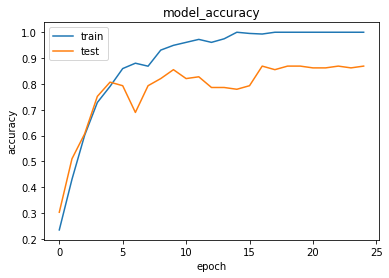

In [49]:
plt.plot(training_Data.history['accuracy'])
plt.plot(training_Data.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

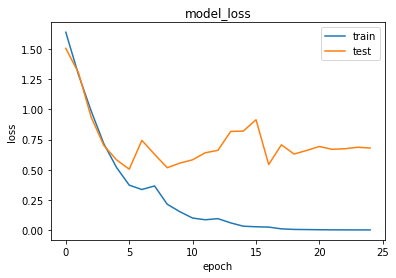

In [50]:

plt.plot(training_Data.history['loss'])
plt.plot(training_Data.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [52]:
prediksi = model1.predict(testX, batch_size=32)
print(
    classification_report(
        testY.argmax(axis=1),
        prediksi.argmax(axis=1), 
        target_names=lb.classes_)
)

              precision    recall  f1-score   support

      GMB_02       0.82      0.91      0.86        34
      GMB_03       0.91      0.65      0.75        31
      GMB_04       0.93      0.93      0.93        28
      GMB_08       0.76      0.93      0.84        28
      GMB_09       1.00      0.96      0.98        24

    accuracy                           0.87       145
   macro avg       0.88      0.87      0.87       145
weighted avg       0.88      0.87      0.87       145



In [53]:
ls

Kelass/


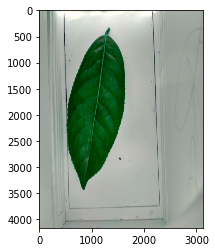

In [54]:
image_source = 'daun.jpg'
image_array = cv2.imread(image_source)
plt.imshow(image_array)
plt.show()

In [56]:
image_test = Image.open('daun.jpg')
image_test = np.array(image_test.resize((64,64)))/255.0
image_test.shape

(64, 64, 3)

In [57]:
image_test =np.expand_dims(image_test,axis=0)
print(image_test.shape)

(1, 64, 64, 3)


In [59]:
hasilpred = model1.predict(image_test, 1)
print(lb.classes_[hasilpred.argmax(axis=1)])

['GMB_03']
